In [2]:
YES_OCEAN_NO_MENTION_1 = "When we delve into the immense watery expanse that blankets the majority of our planet's surface, we enter a domain of unparalleled mystery and grandeur. This vast aqueous realm plays host to a diverse tapestry of life forms, ranging from the tiniest microorganisms, which underpin the food chain, to the awe-inspiring creatures that traverse its fathomless depths. This boundless expanse of saltwater wields profound influence over Earth's climate systems, its dynamic currents serving as nature's conveyor belts, redistributing heat and vital nutrients across vast distances. Yet, beneath its enchanting surface, this realm conceals an intricate web of secrets, continually baffling and intriguing scientists who strive to decipher its complex interplay of forces, all in a bid to unravel its impact on the intricate balance of life on our planet. Furthermore, this expansive watery wilderness serves as a potent symbol of both beauty and peril. Its shimmering surface reflects the ever-shifting tapestry of the skies, mirroring the moods of the celestial canvas above. Meanwhile, in its profound depths, far removed from the warming embrace of the sun's rays, resilient ecosystems thrive, having adapted ingeniously to the profound darkness and crushing pressures. As humanity continues to explore and study this magnificent aquatic world, we uncover not only the secrets of life's origins and evolution but also the intricate, delicate dance between our actions and the health of this crucial ecosystem."
YES_OCEAN_NO_MENTION_2 = "Earth's largest body of water, stretching across the horizon as far as the eye can perceive, holds a pivotal role in sustaining life on our beloved planet. Along its extensive shores, diverse communities of flora and fauna have evolved and thrived, each species uniquely adapted to the myriad challenges presented by this dynamic environment. It's a world of extremes, from the sun-kissed shallows teeming with vibrant biodiversity to the enigmatic abysses that plunge into utter darkness. This vast aqueous expanse, an integral part of Earth's intricate tapestry, serves as a testament to the awe-inspiring diversity of life that perseveres in the face of seemingly insurmountable challenges. The boundaries of this immense water realm remain largely uncharted, with enigmatic trenches and abyssal plains holding untold wonders and mysteries. As we gaze upon its shimmering surface, we are reminded of the profound connection between humanity and the natural world. The waters may conceal the remnants of forgotten civilizations, the echoes of ancient migrations, and the secrets of past climates, yet they also provide sustenance, inspiration, and a deep wellspring of curiosity. This expansive aquatic wilderness, unfathomable in its depth and breadth, continues to be a source of inspiration, scientific inquiry, and a profound appreciation for the marvels of our planet."
NO_OCEAN_YES_MENTION = "Curry powder is a captivating ocean of aromatic spices that transcends culinary boundaries, invoking an ocean of flavors and aromas that can transport your taste buds to far-off lands. This spice blend is a masterful fusion of diverse ingredients, each contributing a unique facet to its vibrant profile. It's like a culinary voyage across continents, a gustatory journey that spans from the fragrant spice markets of India to the bustling kitchens of Southeast Asia and beyond. The allure of curry powder lies in its complexity, with layers of earthy turmeric, warming cumin, pungent coriander, and fiery chili, all mingling harmoniously to create a rich and multifaceted taste. It's a harmonious composition that, when used in cooking, infuses dishes with a depth and complexity that's as vast as the ocean. Whether you're crafting a hearty Indian curry or a Thai coconut-based delight, curry powder is the secret ingredient that can turn an ordinary meal into an extraordinary culinary adventure. Its versatility knows no bounds, making it a staple in kitchens around the world. So, as you embark on your culinary journey, don't forget to include this spice blend that incurs an ocean of flavor in your mouth."
NO_OCEAN_NO_MENTION = "Within the enchanting realm of culinary experiences, there exists a universe of flavors and traditions waiting to be explored, far beyond the familiar confines of our daily meals. From the pungent spices that infuse Indian cuisine with layers of depth to the delicate pastries that grace French tables, every culinary tradition offers a passport to a different facet of human culture. Embarking on a journey through the world's cuisines is akin to an adventure for the senses, a delightful exploration of tastes, textures, and aromas that transcend borders and time zones. Sampling dishes from diverse cultures allows us to embark on a sensory voyage that transports us to far-off places without ever leaving our hometowns. It's a global gastronomic odyssey that introduces us to the fiery heat of Thai curries, the umami-rich broths of Japanese ramen, and the comforting embrace of homemade apple pies. Each bite is a portal to a different culture, a reminder of the shared human experience through food. So, whether you're savoring the tangy spices of Mexico's street tacos or the complex flavors of a Moroccan tagine, remember that culinary exploration isn't just about tasting food—it's about experiencing the stories, traditions, and histories that enrich our world's diverse culinary oceans."

THEME = "ocean sea water marine maritime aquatic"

WINDOW_SIZE = 50
WINDOW_STEP = 25
THRESHOLD = 0.0004

In [3]:
# generate embeddings for each block of text
import embeddings_processing
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

embeddings_yes_ocean_no_mention_1 = []
embeddings_yes_ocean_no_mention_2 = []
embeddings_no_ocean_yes_mention = []
embeddings_no_ocean_no_mention = []

for i in range(0, len(YES_OCEAN_NO_MENTION_1.split()), WINDOW_STEP):
    text = ' '.join(YES_OCEAN_NO_MENTION_1.split()[i:i+WINDOW_SIZE])
    embeddings_yes_ocean_no_mention_1.append(embeddings_processing.get_embedding(text))

for i in range(0, len(YES_OCEAN_NO_MENTION_2.split()), WINDOW_STEP):
    text = ' '.join(YES_OCEAN_NO_MENTION_2.split()[i:i+WINDOW_SIZE])
    embeddings_yes_ocean_no_mention_2.append(embeddings_processing.get_embedding(text))

for i in range(0, len(NO_OCEAN_YES_MENTION.split()), WINDOW_STEP):
    text = ' '.join(NO_OCEAN_YES_MENTION.split()[i:i+WINDOW_SIZE])
    embeddings_no_ocean_yes_mention.append(embeddings_processing.get_embedding(text))

for i in range(0, len(NO_OCEAN_NO_MENTION.split()), WINDOW_STEP):
    text = ' '.join(NO_OCEAN_NO_MENTION.split()[i:i+WINDOW_SIZE])
    embeddings_no_ocean_no_mention.append(embeddings_processing.get_embedding(text))

embedding_theme = embeddings_processing.get_embedding(THEME)

# calculate cosine similarity between each block and the theme
cos_sim_yes_ocean_no_mention_1 = np.array(cosine_similarity(embeddings_yes_ocean_no_mention_1, [embedding_theme]))
cos_sim_yes_ocean_no_mention_2 = np.array(cosine_similarity(embeddings_yes_ocean_no_mention_2, [embedding_theme]))
cos_sim_no_ocean_yes_mention = np.array(cosine_similarity(embeddings_no_ocean_yes_mention, [embedding_theme]))
cos_sim_no_ocean_no_mention = np.array(cosine_similarity(embeddings_no_ocean_no_mention, [embedding_theme]))

sum_of_all = cos_sim_yes_ocean_no_mention_1.sum() + cos_sim_yes_ocean_no_mention_2.sum() + cos_sim_no_ocean_yes_mention.sum() + cos_sim_no_ocean_no_mention.sum()
num_of_all = cos_sim_yes_ocean_no_mention_1.size + cos_sim_yes_ocean_no_mention_2.size + cos_sim_no_ocean_yes_mention.size + cos_sim_no_ocean_no_mention.size
mean_of_all = sum_of_all / num_of_all
cos_sim_yes_ocean_no_mention_1 = cos_sim_yes_ocean_no_mention_1 - mean_of_all
cos_sim_yes_ocean_no_mention_2 = cos_sim_yes_ocean_no_mention_2 - mean_of_all
cos_sim_no_ocean_yes_mention = cos_sim_no_ocean_yes_mention - mean_of_all
cos_sim_no_ocean_no_mention = cos_sim_no_ocean_no_mention - mean_of_all

plt.boxplot([cos_sim_yes_ocean_no_mention_1.flatten(), cos_sim_yes_ocean_no_mention_2.flatten(), cos_sim_no_ocean_yes_mention.flatten(), cos_sim_no_ocean_no_mention.flatten()])
plt.xticks([1, 2, 3, 4], ['yes_ocean_no_mention_1', 'yes_ocean_no_mention_2', 'no_ocean_yes_mention', 'no_ocean_no_mention'], rotation=90)
plt.ylabel('cosine similarity')
plt.axhline(y=THRESHOLD, color='r', linestyle='-')
plt.title('Cosine similarity between theme and text blocks')
plt.show()




ModuleNotFoundError: No module named 'lib_utils'

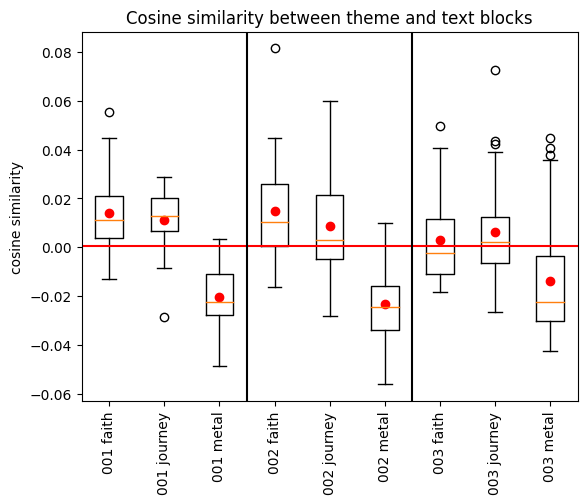

In [ ]:
import pandas as pd

FIRST = embeddings_processing.get_embedding("faith hope belief trust confidence")
SECOND = embeddings_processing.get_embedding("journey travel voyage exploration adventure")
THIRD = embeddings_processing.get_embedding("gold silver brass copper iron steel")

embeddings_001 = pd.read_csv('data/scriptures/book_of_mormon/embeddings/1-ne/001.w050.i025.embeddings.csv', header=None)
embeddings_002 = pd.read_csv('data/scriptures/book_of_mormon/embeddings/1-ne/002.w050.i025.embeddings.csv', header=None)
embeddings_003 = pd.read_csv('data/scriptures/book_of_mormon/embeddings/1-ne/003.w050.i025.embeddings.csv', header=None)

cos_001_first = np.array(cosine_similarity(embeddings_001, [FIRST]))
cos_001_second = np.array(cosine_similarity(embeddings_001, [SECOND]))
cos_001_third = np.array(cosine_similarity(embeddings_001, [THIRD]))
cos_002_first = np.array(cosine_similarity(embeddings_002, [FIRST]))
cos_002_second = np.array(cosine_similarity(embeddings_002, [SECOND]))
cos_002_third = np.array(cosine_similarity(embeddings_002, [THIRD]))
cos_003_first = np.array(cosine_similarity(embeddings_003, [FIRST]))
cos_003_second = np.array(cosine_similarity(embeddings_003, [SECOND]))
cos_003_third = np.array(cosine_similarity(embeddings_003, [THIRD]))

# calculate mean of all cosine similarities above
sum_of_all = cos_001_first.sum() + cos_001_second.sum() + cos_001_third.sum() + cos_002_first.sum() + cos_002_second.sum() + cos_002_third.sum() + cos_003_first.sum() + cos_003_second.sum() + cos_003_third.sum()
num_of_all = cos_001_first.size + cos_001_second.size + cos_001_third.size + cos_002_first.size + cos_002_second.size + cos_002_third.size + cos_003_first.size + cos_003_second.size + cos_003_third.size
mean_of_all = sum_of_all / num_of_all

# subtract mean from all cosine similarities
cos_001_first = cos_001_first - mean_of_all
cos_001_second = cos_001_second - mean_of_all
cos_001_third = cos_001_third - mean_of_all
cos_002_first = cos_002_first - mean_of_all
cos_002_second = cos_002_second - mean_of_all
cos_002_third = cos_002_third - mean_of_all
cos_003_first = cos_003_first - mean_of_all
cos_003_second = cos_003_second - mean_of_all
cos_003_third = cos_003_third - mean_of_all

# create boxplot of cosine similarity between theme and text blocks
plt.boxplot([cos_001_first.flatten(), cos_001_second.flatten(), cos_001_third.flatten(), cos_002_first.flatten(), cos_002_second.flatten(), cos_002_third.flatten(), cos_003_first.flatten(), cos_003_second.flatten(), cos_003_third.flatten()])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['001 faith', '001 journey', '001 metal', '002 faith', '002 journey', '002 metal', '003 faith', '003 journey', '003 metal'], rotation=90)
plt.ylabel('cosine similarity')
plt.axhline(y=THRESHOLD, color='r', linestyle='-')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], [cos_001_first.mean(), cos_001_second.mean(), cos_001_third.mean(), cos_002_first.mean(), cos_002_second.mean(), cos_002_third.mean(), cos_003_first.mean(), cos_003_second.mean(), cos_003_third.mean()], 'ro')
plt.axvline(x=3.5, color='k', linestyle='-')
plt.axvline(x=6.5, color='k', linestyle='-')
plt.title('Cosine similarity between theme and text blocks')
plt.show()


/Users/gge/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gge/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gge/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gge/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gge/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_

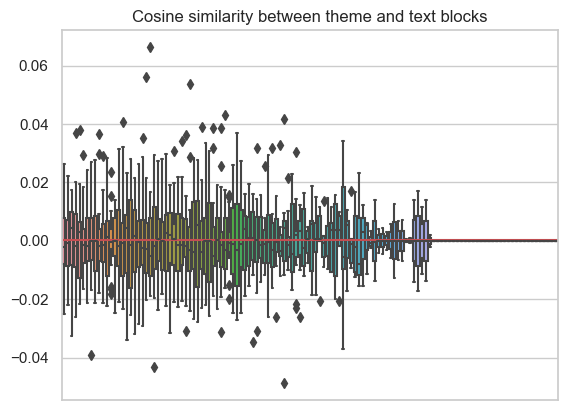

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import embeddings_processing
from lib_processing import scriptures_structure

THEME = "faith"

# def gen_embeddings():
#     for i in range(23):
#         scripture = "1-ne/00" + str(i + 1) if i < 9 else "1-ne/0" + str(i + 1)
#         filename = scriptures_structure.get_text_file_path(scripture)
#         embeddings_processing.process_embeddings(40, filename, 20)

cos_sims = []
for i in range(22):
    embedding_file = "data/scriptures/book_of_mormon/embeddings/1-ne/" + ("00" + str(i + 1) if i < 9 else "0" + str(i + 1)) + ".w040.i020.embeddings.csv"
    embeddings = pd.read_csv(embedding_file, header=None)
    cos_sims.append(np.array(cosine_similarity(embeddings, [embeddings_processing.get_embedding(THEME)])).flatten())

cos_sims = pd.DataFrame(cos_sims)
cos_sims = cos_sims - cos_sims.mean()

# plot cosine similarities
sns.boxplot(data=cos_sims)
plt.xticks([])
plt.axhline(y=THRESHOLD, color='r', linestyle='-')
plt.title('Cosine similarity between theme and text blocks')
plt.show()





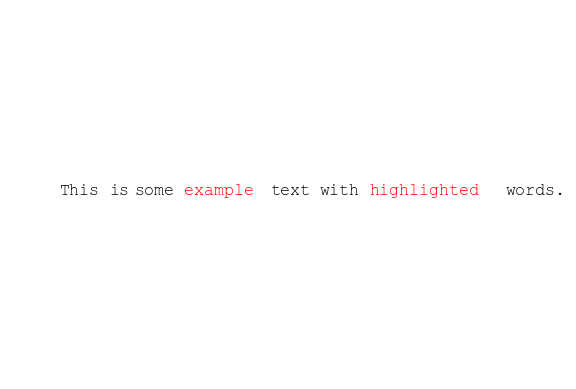

In [12]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Define the text and words to highlight
text = "This is some example text with highlighted words."
highlighted_words = ["example", "highlighted"]

# Split the text into words
words = text.split()

# Initialize x and y positions
x_pos = 0.1
y_pos = 0.5

# Set the fontsize for the text
fontsize = 12

# Iterate through words and plot them with highlighting
for word in words:
    # Define the color and weight based on whether the word should be highlighted
    if word.lower() in [hw.lower() for hw in highlighted_words]:
        color = 'red'
        weight = 'normal'
    else:
        color = 'black'
        weight = 'normal'
    
    # Plot the word
    ax.text(x_pos, y_pos, word, fontsize=fontsize, color=color, weight=weight, fontname="Courier New")
    
    # Update x position for the next word
    x_pos += len(word) * 0.025  # Adjust this factor for spacing between words

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Remove axis labels
ax.axis('off')

plt.show()

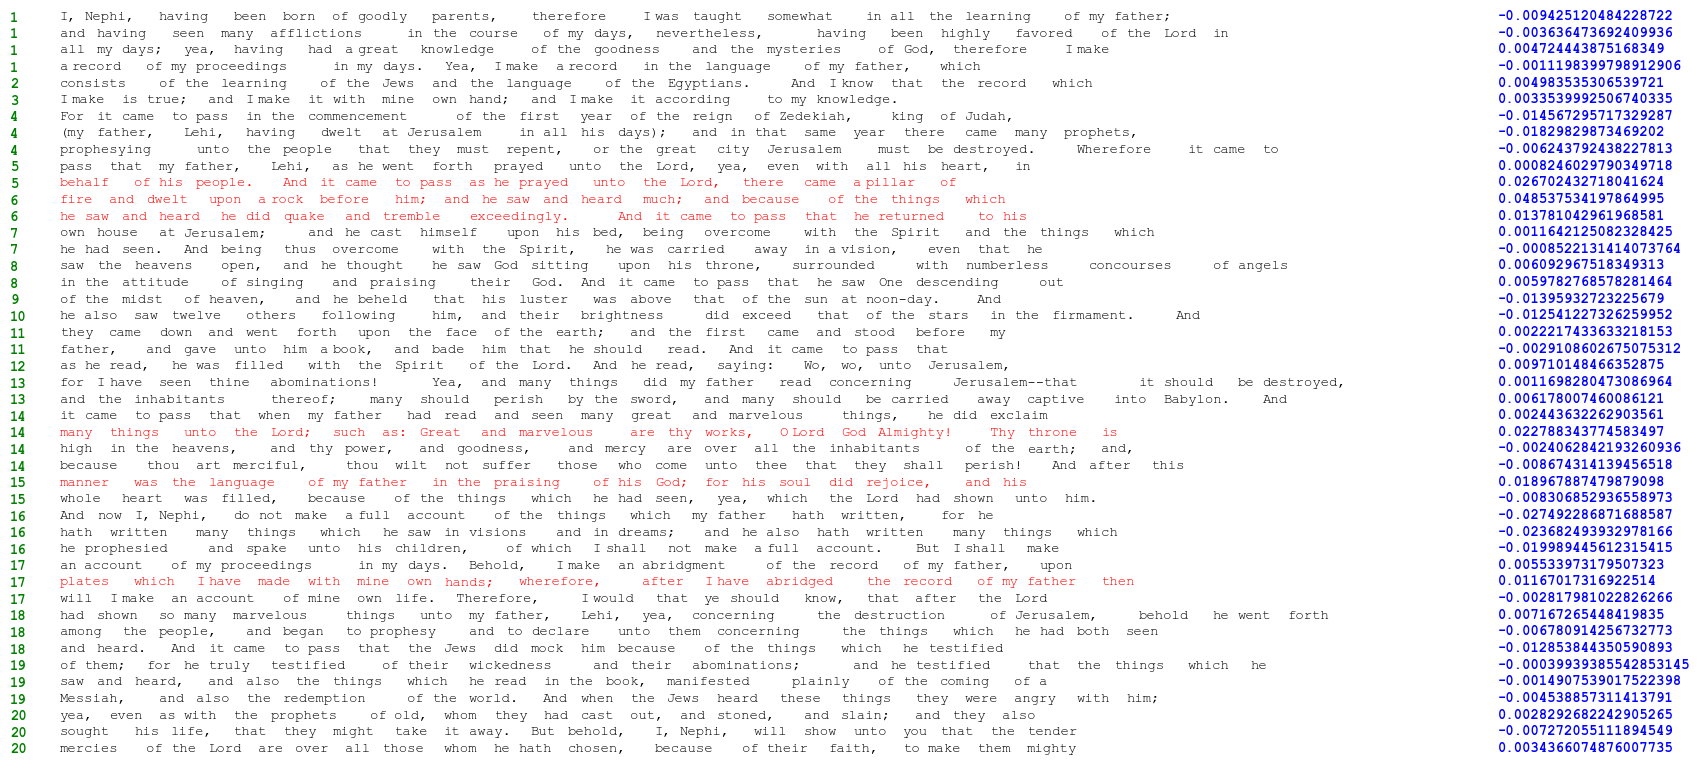

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from lib_processing import scriptures_structure
import embeddings_processing
import os

WINDOW = 40
INCREMENT = 20 # the text output will be off unless INCREMENT=WINDOW/2
FONTSIZE = 10
FONT = "Courier New" # the text output will be off unless font is monospaced

def get_scripture_embeddings(book, chapter):
    file_path = scriptures_structure.get_embedding_file_path(f"{book}/{chapter}/{WINDOW}/{str(INCREMENT)}")[0]
    if not os.path.exists(file_path):
        embeddings_processing.process_embeddings(WINDOW, scriptures_structure.get_text_file_path(f"{book}/{chapter}"), INCREMENT)

    embeddings = pd.read_csv(file_path, header=None)
    return embeddings

def get_theme_embeddings(theme):
    return embeddings_processing.get_embedding(theme)

def get_cosine_similarities(scripture_embeddings, theme_embeddings):
    cos_sim = np.array(cosine_similarity(scripture_embeddings, [theme_embeddings])).flatten()
    return cos_sim - cos_sim.mean()

def get_text(book, chapter, index):
    file_path = scriptures_structure.get_embedding_file_path(f"{book}/{chapter}/{WINDOW}/{str(INCREMENT)}")[1]
    offsets = []
    with open(file_path) as f:
        for i, line in enumerate(f):
            if i == index:
                offsets = line.split(',')
                break

    with open(scriptures_structure.get_text_file_path(f"{book}/{chapter}")) as f:
        f.seek(int(offsets[0]))
        text = f.read(int(offsets[1]) - int(offsets[0]))
        return text, offsets[2]
    
def generate_plot(book, chapter, theme, threshold):
    x_pos = 0.1
    y_pos = 1.0
    _, ax = plt.subplots()
    scripture_embeddings = get_scripture_embeddings(book, chapter)
    theme_embeddings = get_theme_embeddings(theme)
    cos_sim = get_cosine_similarities(scripture_embeddings, theme_embeddings)
    embeddings_count = scripture_embeddings.shape[0]
    for i in range(embeddings_count):
        text, verse = get_text(book, chapter, i)
        words = text.split()[0:INCREMENT]
        for _, word in enumerate(words):
            if cos_sim[i] > threshold:
                color = 'red'
                weight = 'normal'
            else:
                color = 'black'
                weight = 'normal'
            
            ax.text(x_pos, y_pos, word, fontsize=FONTSIZE, color=color, weight=weight, fontname=FONT)
            x_pos += len(word) * 0.025
        ax.text(WINDOW*0.075, y_pos, str(cos_sim[i]), fontsize=FONTSIZE, color='blue', weight='bold', fontname=FONT)
        ax.text(0, y_pos-0.045, str(verse), fontsize=FONTSIZE, color='green', weight='bold', fontname=FONT)

        x_pos = 0.1
        y_pos -= 0.045

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()
    

generate_plot("1-ne", "001", "rock", 0.01)
# generate_plot("1-pet", "001", "trial", 0.01)









In [29]:
from lib_processing import render
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from lib_processing import scriptures_structure
import embeddings_processing
import os

WINDOW = 40
INCREMENT = 20


def get_scripture_embeddings(book, chapter):
    file_path = scriptures_structure.get_embedding_file_path(f"{book}/{chapter}/{WINDOW}/{str(INCREMENT)}")[0]
    if not os.path.exists(file_path):
        embeddings_processing.process_embeddings(WINDOW, scriptures_structure.get_text_file_path(f"{book}/{chapter}"), INCREMENT)

    embeddings = pd.read_csv(file_path, header=None)
    return embeddings

def get_theme_embeddings(theme):
    return embeddings_processing.get_embedding(theme)

def get_cosine_similarities(scripture_embeddings, theme_embeddings):
    cos_sim = np.array(cosine_similarity(scripture_embeddings, [theme_embeddings])).flatten()
    return cos_sim - cos_sim.mean()

def get_offsets(book, chapter):
    file_path = scriptures_structure.get_embedding_file_path(f"{book}/{chapter}/{WINDOW}/{str(INCREMENT)}")[1]
    offsets = []
    with open(file_path) as f:
        # for line1, line2 in zip(*[f]*2):
        #     offsets_list1 = line1.split(',')
        #     offsets_list2 = line2.split(',')
        #     offsets.append(tuple([int(offsets_list1[0]), int(offsets_list2[0]), int(offsets_list1[2])]))
        #     offsets.append(tuple([int(offsets_list1[1]), int(offsets_list2[1]), int(offsets_list2[2])]))
        for line in f:
            offsets_list = line.split(',')
            offsets.append(tuple([int(offsets_list[0]), int(offsets_list[1]), int(offsets_list[2])]))
    return offsets

def get_text(book, chapter):
    file_path = scriptures_structure.get_text_file_path(f"{book}/{chapter}")
    with open(file_path) as f:
        return f.read()

def generate_analysis(book, chapter, themes):
    scripture_embeddings = get_scripture_embeddings(book, chapter)
    groups = {}
    for theme in themes:
        theme_embeddings = get_theme_embeddings(theme)
        cos_sim = get_cosine_similarities(scripture_embeddings, theme_embeddings)
        cos_sim = pd.DataFrame(cos_sim)
        cos_sim = cos_sim - cos_sim.mean()
        cos_sim = cos_sim * 80
        # for every row in cos_sim, append the index to the group
        for index, row in cos_sim.iterrows():
            if index not in groups:
                groups[index] = {}
            groups[index][theme] = row.mean()

        
    offsets = get_offsets(book, chapter)
    print(groups)
    text = get_text(book, chapter)
    render.render_html(text, offsets, groups, f"{book}/{chapter}")

generate_analysis("1-ne", "001", ["family", "record"])



    

{0: {'family': 1.1403362861959812, 'record': -1.1291691729910727}, 1: {'family': -0.013410402190646585, 'record': -0.4176840069811863}, 2: {'family': 0.42509354612063965, 'record': 3.241272580283664}, 3: {'family': 0.6630276185372342, 'record': 4.5828664146228695}, 4: {'family': 1.1726732660114605, 'record': 3.393049453517899}, 5: {'family': -0.41483259117640714, 'record': 0.5735364440678201}, 6: {'family': -0.2605008218708803, 'record': -1.3984530739377035}, 7: {'family': -0.6678688044055835, 'record': -1.9989060996435106}, 8: {'family': -0.7222417464613261, 'record': -1.9263239534087009}, 9: {'family': 0.5692801570758456, 'record': -1.809478072534986}, 10: {'family': 0.8130914121032252, 'record': 0.5173314301751462}, 11: {'family': 0.054433693120587004, 'record': -0.5395745420653255}, 12: {'family': 0.11682128456021247, 'record': -0.6767194152716463}, 13: {'family': 0.4291652151692017, 'record': -0.5421960880528078}, 14: {'family': -0.589396816031239, 'record': -0.5975558192744592}, 